In [23]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [24]:
df = pd.read_csv('ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [25]:
df_length = len(df)

In [26]:
print(df_length)

294478


In [27]:
len(df.user_id.unique())

290584

In [28]:
df.converted.sum()/df_length

0.11965919355605512

In [29]:
df_treat = df[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]

df_control = df[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]

mismatch = len(df_treat) + len(df_control)

mismatch_df = pd.concat([df_treat, df_control])

mismatch

3893

In [30]:
df.isnull().values.any()

False

In [31]:
df2 = df

mismatch_index = mismatch_df.index
df2 = df2.drop(mismatch_index)

In [32]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [33]:
print("Unique users: ", len(df2.user_id.unique()))

print("Non-Unique users: ", len(df2)-len(df2.user_id.unique()))

Unique users:  290584
Non-Unique users:  1


In [34]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [35]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [36]:
df2.drop(labels = 1899, axis = 0, inplace = True)

In [37]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [38]:
print("Probability of user conerting: ", df2.converted.mean())

Probability of user conerting:  0.11959708724499628


In [39]:
print("Probability of control group converting: ", df2[df2['group'] == 'control']['converted'].mean())

Probability of control group converting:  0.1203863045004612


In [40]:
print("Probability of treatment group converting: ", df2[df2['group'] == 'treatment']['converted'].mean())

Probability of treatment group converting:  0.11880806551510564


In [41]:
print("Probability an individual received new page: ", df2['landing_page'].value_counts()[0]/len(df2))

Probability an individual received new page:  0.500061944223


# A/B Testing

Calculate probability of conversion for new page

In [42]:
p_new = df2[df2['landing_page'] == 'new_page']['converted'].mean()

print("Probabaility of conversion for new page (p_new): ", p_new )

Probabaility of conversion for new page (p_new):  0.11880806551510564


Calculate probability of conversion for old page

In [43]:
p_old = df2[df2['landing_page'] == 'old_page']['converted'].mean()

print("Probaility of conversion for old page (old_page): ", p_old)

Probaility of conversion for old page (old_page):  0.1203863045004612


Take mean of these wo probabilities

In [44]:
p_mean = np.mean([p_new, p_old])

print("Probability of conversion undere null hypothesis (p_mwan): ", p_mean)

Probability of conversion undere null hypothesis (p_mwan):  0.119597185008


Calculate difference in probability of new and old page

In [45]:
p_diff = p_new - p_old

print("Difference in probability of conversion for new and old page (p_diff): ", p_diff)

Difference in probability of conversion for new and old page (p_diff):  -0.0015782389853555567


Calculate n_new and n_old

In [47]:
n_new, n_old = df2['landing_page'].value_counts()

print("New: ", n_new, "\nOld: ", n_old)

New:  145310 
Old:  145274


Simulate conversion raes under null hypothesis

In [50]:
new_page_converted = np.random.choice([1,0], size = n_new, p=[p_mean, (1-p_mean)])

new_page_converted.mean()

0.11952377675314844

Simulate conversion rates under null hypothesis

In [51]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_mean, (1-p_mean)])

old_page_converted.mean()

0.11933312223797789

Calculate difference in p under the null hypothesis

In [52]:
new_page_converted.mean() - old_page_converted.mean()

0.00019065451517055743

In [55]:
p_diffs = []

for i in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_mean, (1 - p_mean)])
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_mean, (1 - p_mean)])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)
    

Plot Histogram

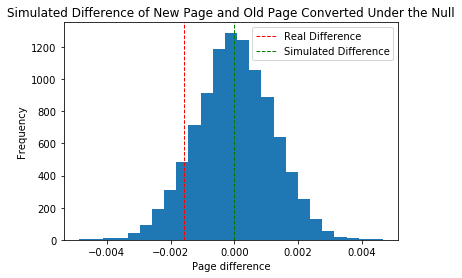

In [57]:
plt.hist(p_diffs, bins = 25)
plt.title('Simulated Difference of New Page and Old Page Converted Under the Null')
plt.xlabel('Page difference')
plt.ylabel('Frequency')
plt.axvline(x=(p_new - p_old), color = 'r', linestyle = 'dashed', linewidth = 1, label = "Real Difference")
plt.axvline(x=(np.array(p_diffs).mean()), color = 'g', linestyle = 'dashed', linewidth = 1, label = "Simulated Difference")
plt.legend()
plt.show()

In [58]:
p_diff = p_new - p_old

FInd the proportion of p_diffs greater than the actual difference

In [59]:
greater_than_diff = [i for i in p_diffs if i > p_diff]

In [60]:
print("Actual difference: ", p_diff)

p_greater_than_diff = len(greater_than_diff)/len(p_diffs)

print('Proportion greater than actual difference: ', p_greater_than_diff)

print('As a percentage: {}%'.format(p_greater_than_diff*100))

Actual difference:  -0.0015782389853555567
Proportion greater than actual difference:  0.9036
As a percentage: 90.36%


In [62]:
# Import statsmodels
import statsmodels.api as sm

# Calculate number of conversions

convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])

print("convert_old: ", convert_old,
     "\nconvert_new: ", convert_new,
     "\nn_old: ", n_old,
     "\nn_new: ", n_new)

C:\Users\Jeet\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


convert_old:  17489 
convert_new:  17264 
n_old:  145274 
n_new:  145310


Find z-score and p-value

In [63]:
z_score, p_value = sm.stats.proportions_ztest(count = [convert_new, convert_old],
                                             nobs = [n_new, n_old])

print("z-score: ", z_score,
     "\np-value: ", p_value)

z-score:  -1.31092419842 
p-value:  0.189883374482


In [64]:
df3 = df2

In [65]:
df3['intercept'] = pd.Series(np.zeros(len(df3)), index = df3.index)
df3['ab_page'] = pd.Series(np.zeros(len(df3)), index = df3.index)

In [69]:
# Find index to be changed for treatment group

index_to_change = df3[df3['group'] == 'treatment'].index

# Change values
df3.set_value(index = index_to_change, col = 'ab_page', value = 1)
df3.set_value(index = df3.index, col = 'intercept', value = 1)

# Change datatype
df3[['intercept', 'ab_page']] = df3[['intercept', 'ab_page']].astype(int)

# Move converted
df3 = df3[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'intercept', 'converted']]

In [70]:
df3[df3['group'] == 'treatment'].head()

,user_id,timestamp,group,landing_page,ab_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


In [71]:
# Setting up Logistic Model

logit = sm.Logit(df3['converted'], df3[['ab_page', 'intercept']])

# Calculate

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [72]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2018-04-27 21:25 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
==================================================================

"""

In [74]:
# Importing Data
df_countries = pd.read_csv('countries.csv')

df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [75]:
df_dummy = pd.get_dummies(data = df_countries, columns = ['country'])

# Performing join

df4 = df_dummy.merge(df3, on = 'user_id')

# Sorting Columns
df4 = df4[['user_id', 'timestamp', 'group', 'landing_page', 'ab_page', 'country_CA', 'country_UK', 'country_US', 'intercept', 'converted']]

#Fix Datatypes
df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']] =\
df4[['ab_page', 'country_CA', 'country_UK', 'country_US','intercept', 'converted']].astype(int)

df4.head()

,user_id,timestamp,group,landing_page,ab_page,country_CA,country_UK,country_US,intercept,converted
0,834778,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
1,928468,2017-01-23 14:44:16.387854,treatment,new_page,1,0,0,1,1,0
2,822059,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1
3,711597,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
4,710616,2017-01-16 13:14:44.000513,treatment,new_page,1,0,1,0,1,0


In [76]:
# Create logit_countries object
logit_countries = sm.Logit(df4['converted'],
                          df4[['country_UK', 'country_US', 'intercept']])

result2 = logit_countries.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [77]:
result2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2018-04-27 21:41 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
country_UK     0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
country_US     0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
==================================================================

"""

In [78]:
# Create logit_countries object
logit_countries2 = sm.Logit(df4['converted'], 
                           df4[['ab_page', 'country_UK', 'country_US', 'intercept']])

result3 = logit_countries2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [79]:
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2018-04-27 21:42 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
country_UK     0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
country_US     0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
==================================================================

"""